# Rating Review Prediction

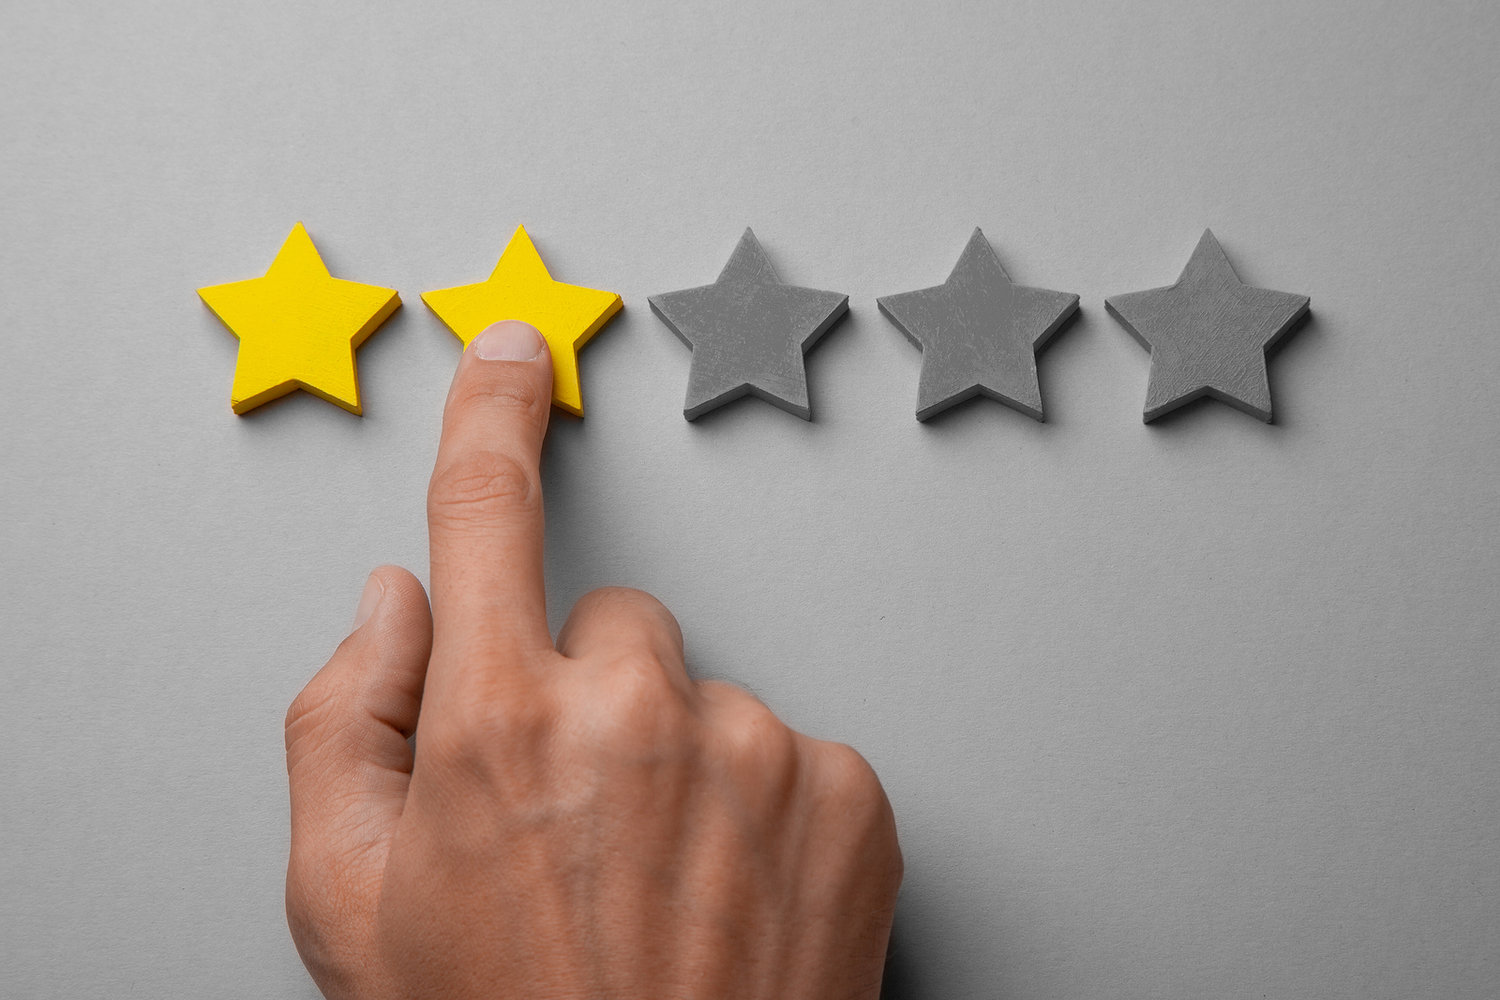

In [19]:
#Importing warning library to avoid any warnings
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [20]:
# Importing dataset excel file using pandas.
data=pd.read_csv("Rattings_scraped.csv") 

In [21]:
print('No. of Rows :',data.shape[0])
print('No. of Columns :',data.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
data.head()

No. of Rows : 46866
No. of Columns : 2


Rattings                                             Review
0         1  Please don't purchase any Lenovo product.4 mon...
1         1  Please don't purchase any Lenovo product.4 mon...
2         1  Please don't purchase any Lenovo product.4 mon...
3         2  I usually research a lot before buying a lapto...
4         5  I am a software engineer, working with Reactjs...

In [22]:
data.info() #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46866 entries, 0 to 46865
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rattings  46866 non-null  int64 
 1   Review    46863 non-null  object
dtypes: int64(1), object(1)
memory usage: 732.4+ KB


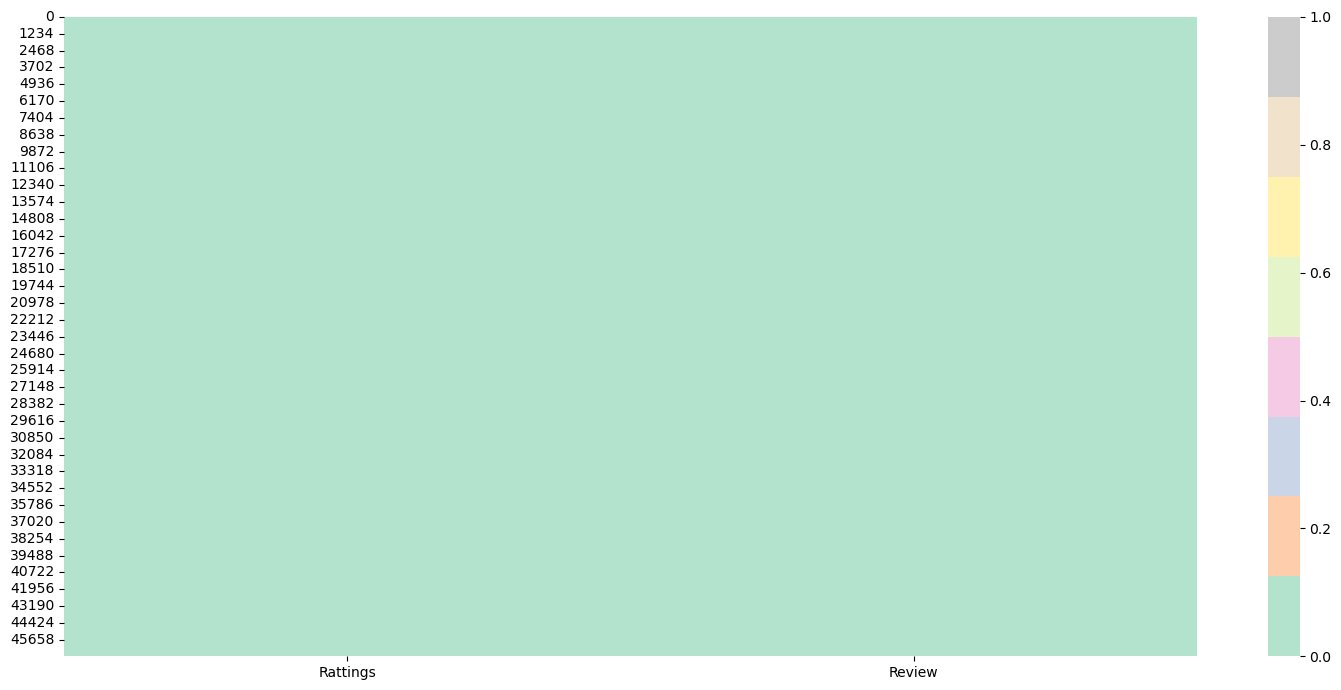

Rattings    0
Review      3
dtype: int64

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(data.isnull(),cmap='Pastel2')
plt.show()
data.isnull().sum()

We will replace missing value in Review with 'Review Not Available'

In [24]:
# Replacing missing data with 'Review Not Available' using pandas fillna()
data['Review'].fillna('Review Not Available',inplace=True)
data.isnull().sum().any()  #Checking after filling them

False

No missing values are there

Exploration of Target Variable Ratings

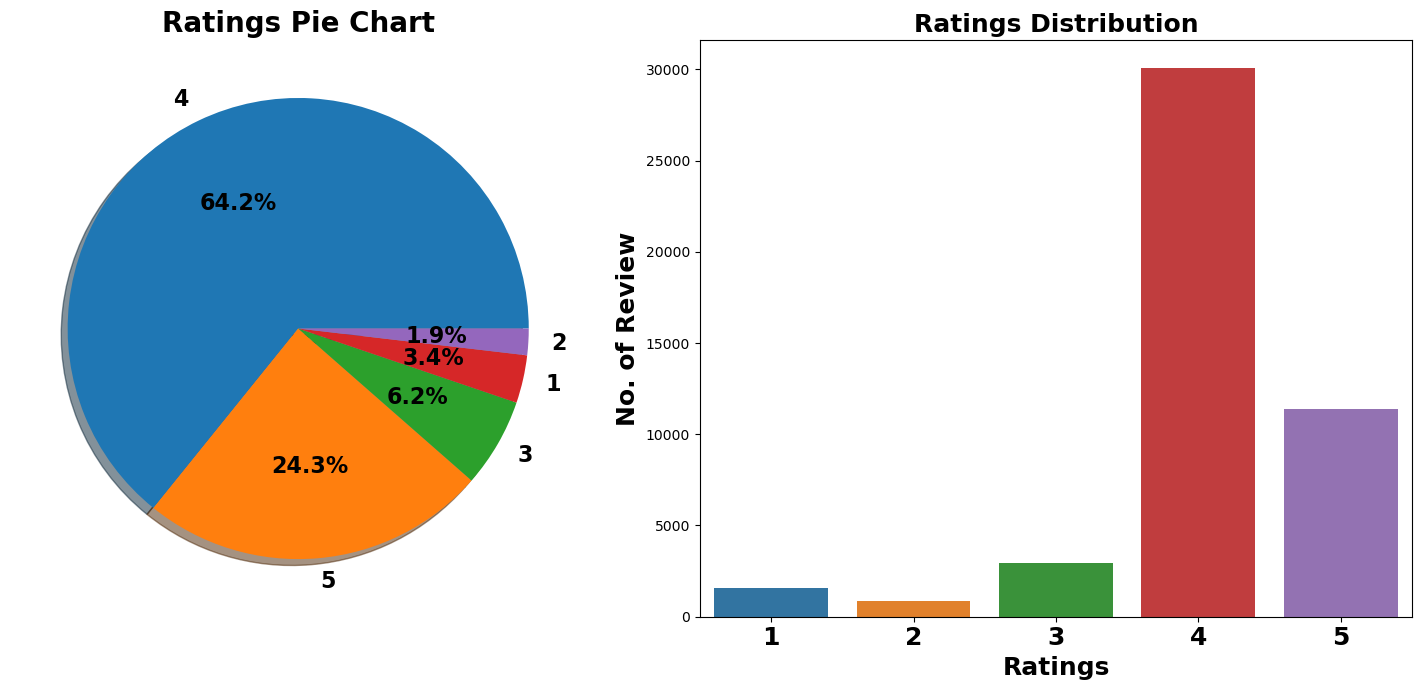

Value Counts of Rating:


4    30086
5    11411
3     2928
1     1571
2      870
Name: Rattings, dtype: int64

In [25]:
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(15,7))
data['Rattings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Rattings',data=data,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
data['Rattings'].value_counts()

In [26]:
# Average Rating given by user
print("Average rating given by users is " + str(data['Rattings'].mean()))

Average rating given by users is 4.04331498314343


Comment :

1) Around 68% customer given 4- star rating followed by 20% customer given lowest 5-star rating.

2) Average Rating is 4.0.

Text Mining

Operation perform are as followed:
    
Removing Punctuations and other special characters

Word Tokenzation

Removing Stop Words

Stemming and Lemmatising

Applying Count Vectoriser

In [27]:
#Importing required libraries
import re 
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pranay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pranay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pranay\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

Applying Regular expression for text extraction.

In [29]:
def clean_text(data, data_column_name):
    
    #Converting all messages to lowercase
    data[data_column_name] = data[data_column_name].str.lower()

    #Replace email addresses with 'email'
    data[data_column_name] = data[data_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    data[data_column_name] = data[data_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    data[data_column_name] = data[data_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    data[data_column_name] = data[data_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    data[data_column_name] = data[data_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    data[data_column_name] = data[data_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    data[data_column_name] = data[data_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    data[data_column_name] = data[data_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    data[data_column_name] = data[data_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [30]:
#Calling the class
clean_text(data, 'Review')
data['Review'].tail(3)

46863    originally using deco e numbr route fully sati...
46864    hialways problem getting strong enough wifi ro...
46865     price negative rest product reliable hassle free
Name: Review, dtype: object

Data Tokenization using RegexpTokenizer

In [31]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
data['Review'] = data['Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
data.head()

Rattings                                             Review
0         1  [please, purchase, lenovo, product, numbr, mon...
1         1  [please, purchase, lenovo, product, numbr, mon...
2         1  [please, purchase, lenovo, product, numbr, mon...
3         2  [usually, research, lot, buying, laptop, hesit...
4         5  [software, engineer, working, reactjs, bought,...

Stemming & Lemmatization

In [32]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

In [33]:
#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))     
    return result

In [34]:
#Processing review with above Function
processed_review = []

for doc in data.Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

46866


[['pleas',
  'purchas',
  'lenovo',
  'product',
  'numbr',
  'month',
  'ago',
  'purchas',
  'lenovo',
  'ideapad',
  'flex',
  'display',
  'issu',
  'complaint',
  'issu',
  'custom',
  'support',
  'center',
  'solv',
  'issu',
  'warranti',
  'period',
  'disappoint',
  'purchas',
  'lenovo',
  'product'],
 ['pleas',
  'purchas',
  'lenovo',
  'product',
  'numbr',
  'month',
  'ago',
  'purchas',
  'lenovo',
  'ideapad',
  'flex',
  'display',
  'issu',
  'complaint',
  'issu',
  'custom',
  'support',
  'center',
  'solv',
  'issu',
  'warranti',
  'period',
  'disappoint',
  'purchas',
  'lenovo',
  'product'],
 ['pleas',
  'purchas',
  'lenovo',
  'product',
  'numbr',
  'month',
  'ago',
  'purchas',
  'lenovo',
  'ideapad',
  'flex',
  'display',
  'issu',
  'complaint',
  'issu',
  'custom',
  'support',
  'center',
  'solv',
  'issu',
  'warranti',
  'period',
  'disappoint',
  'purchas',
  'lenovo',
  'product']]

In [35]:
data['clean_review']=processed_review  #Assigning this to the dataframe
data.head()

Rattings                                             Review  \
0         1  [please, purchase, lenovo, product, numbr, mon...   
1         1  [please, purchase, lenovo, product, numbr, mon...   
2         1  [please, purchase, lenovo, product, numbr, mon...   
3         2  [usually, research, lot, buying, laptop, hesit...   
4         5  [software, engineer, working, reactjs, bought,...   

                                        clean_review  
0  [pleas, purchas, lenovo, product, numbr, month...  
1  [pleas, purchas, lenovo, product, numbr, month...  
2  [pleas, purchas, lenovo, product, numbr, month...  
3  [usual, research, lot, buy, laptop, hesit, buy...  
4  [softwar, engin, work, reactj, buy, window, ta...

In [36]:
data['Review'] = data['clean_review'].apply(lambda x:' '.join(y for y in x))
data.head()

Rattings                                             Review  \
0         1  pleas purchas lenovo product numbr month ago p...   
1         1  pleas purchas lenovo product numbr month ago p...   
2         1  pleas purchas lenovo product numbr month ago p...   
3         2  usual research lot buy laptop hesit buy popula...   
4         5  softwar engin work reactj buy window tablet aw...   

                                        clean_review  
0  [pleas, purchas, lenovo, product, numbr, month...  
1  [pleas, purchas, lenovo, product, numbr, month...  
2  [pleas, purchas, lenovo, product, numbr, month...  
3  [usual, research, lot, buy, laptop, hesit, buy...  
4  [softwar, engin, work, reactj, buy, window, ta...

Plotting wordcloud for different ratings

Word Cloud

Word Cloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. The more commonly the term appears within the text being analysed, the larger the word appears in the image generated. The enlarged texts are the most number of words used there and small texts are the less number of words used.

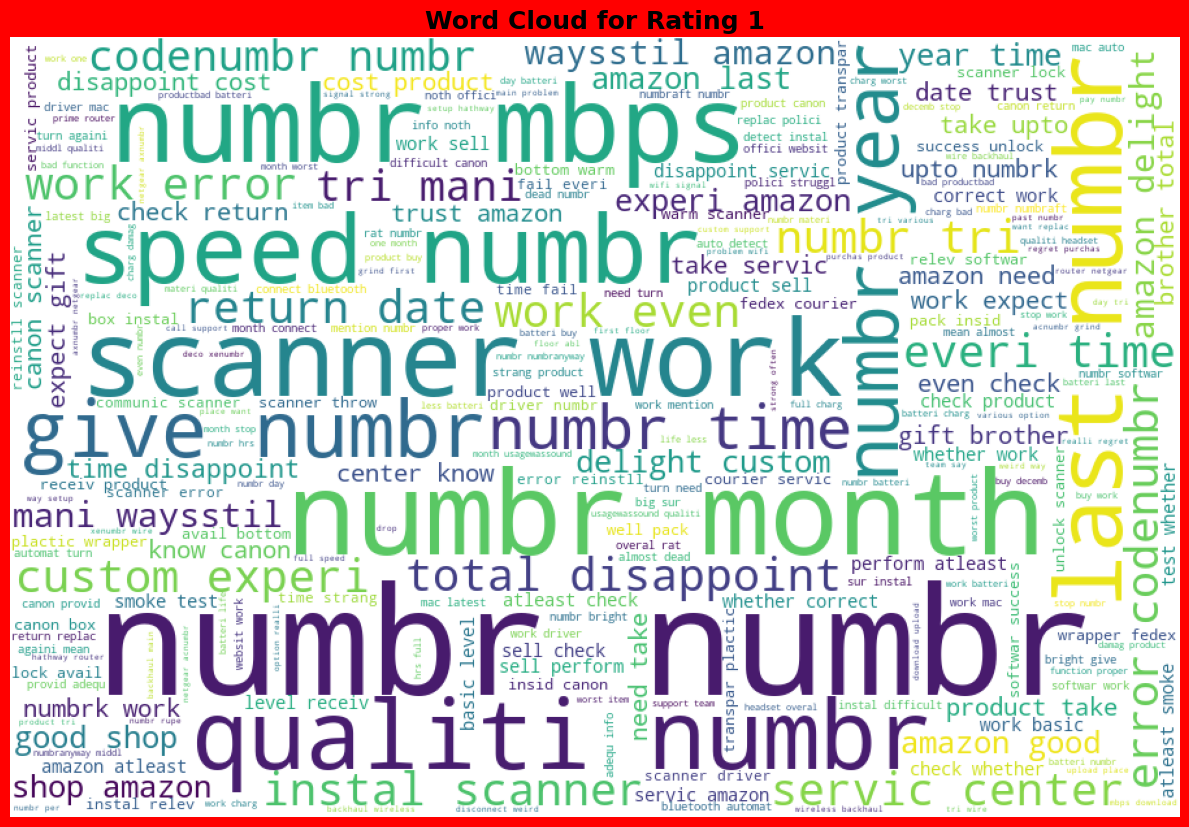

In [37]:
#Getting sense of words in Rating 1
one = data['Review'][data['Rattings']==1.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

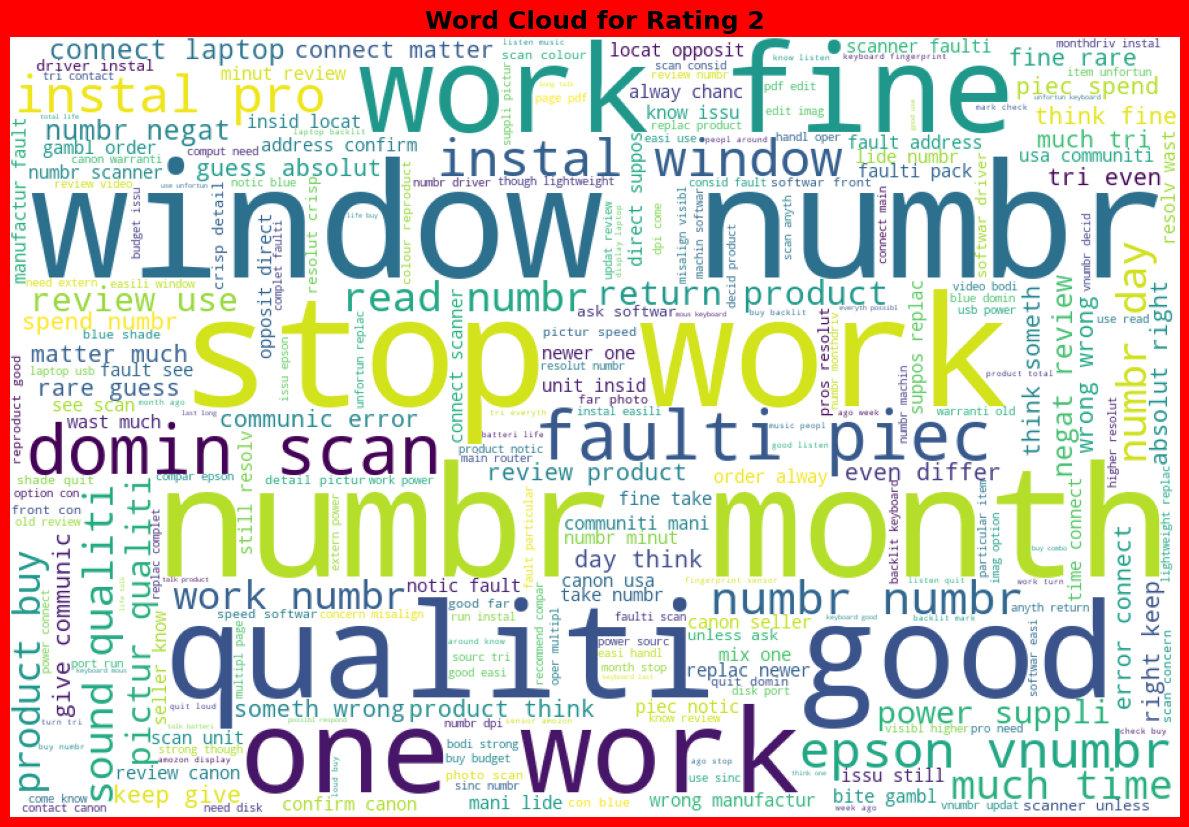

In [38]:
#Getting sense of words in Rating 2
one = data['Review'][data['Rattings']==2.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 2',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

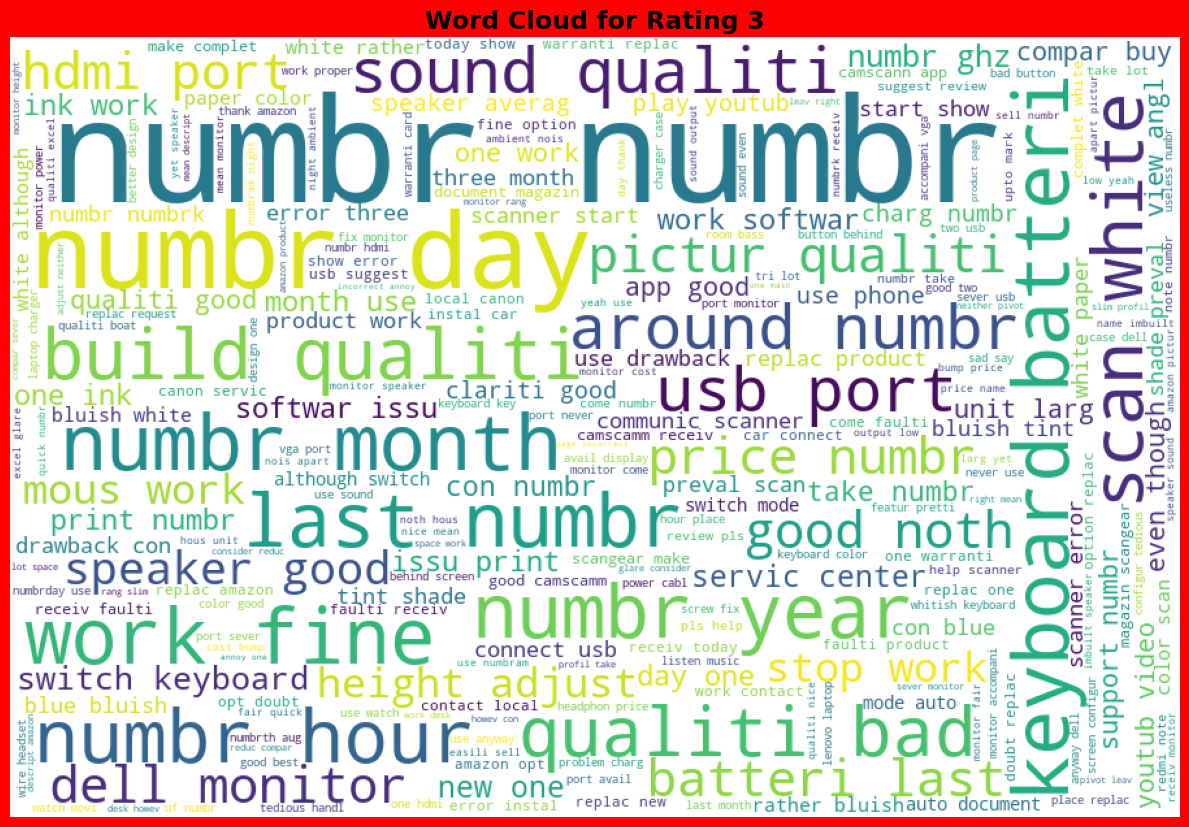

In [39]:
#Getting sense of words in Rating 3
one = data['Review'][data['Rattings']==3.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 3',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

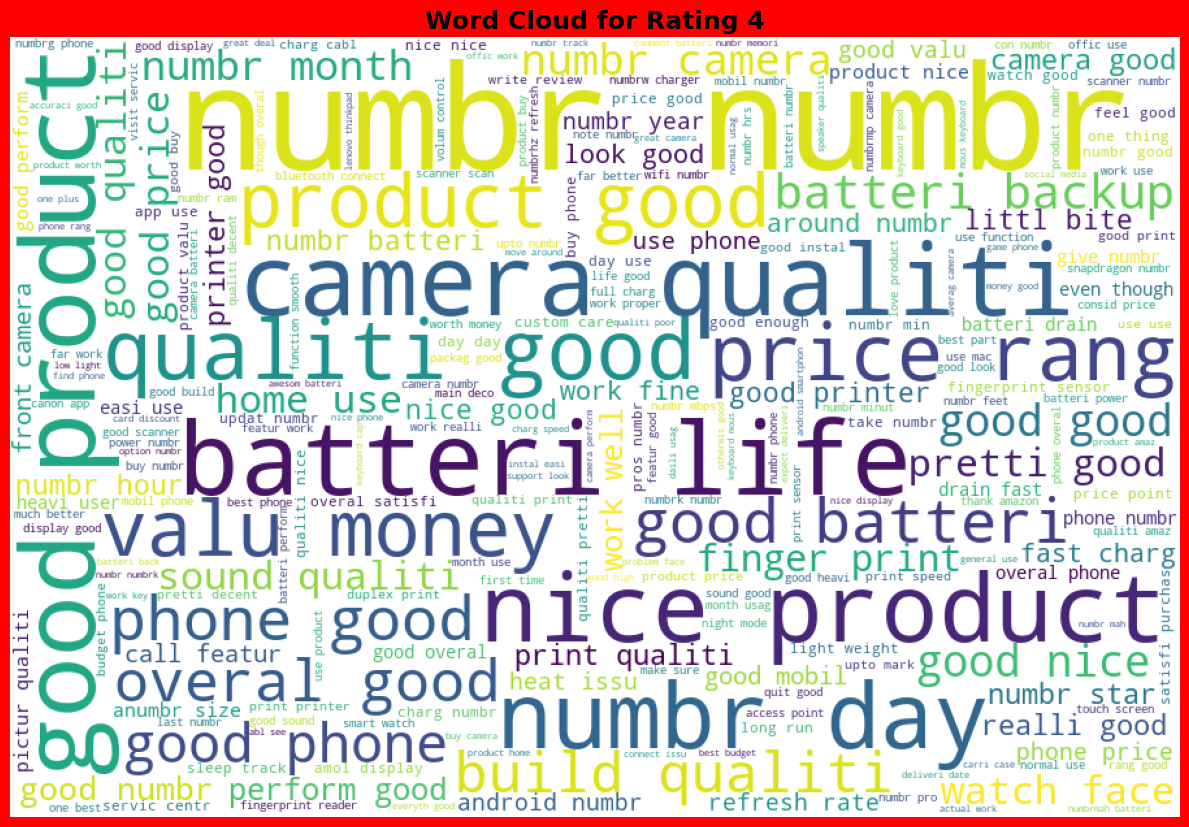

In [40]:
#Getting sense of words in Rating 4
one = data['Review'][data['Rattings']==4.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 4',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

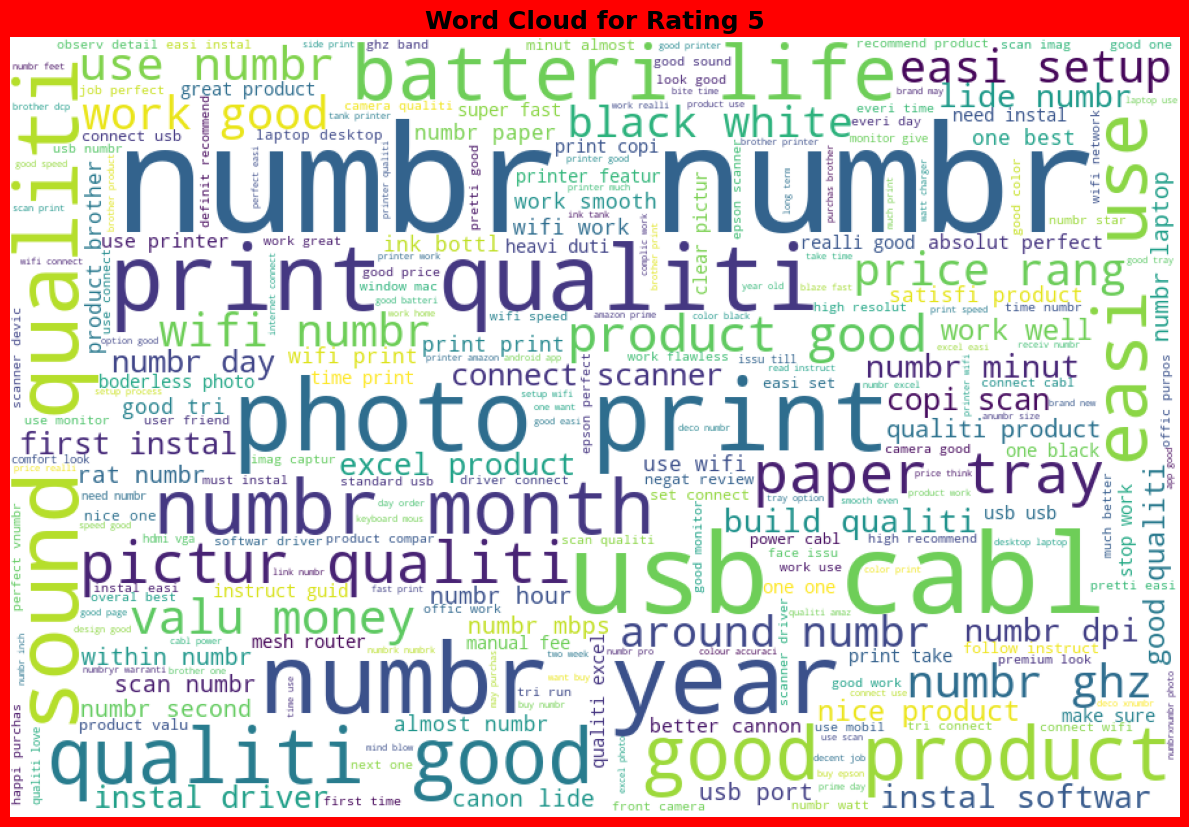

In [41]:
# Getting sense of words in Rating 5
one = data['Review'][data['Rattings']==5.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 5',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

Text Vectorization to convert text into numeric

In [42]:
# Converting text into numeric using TfidataVectorizer
tf = TfidfVectorizer()
features = tf.fit_transform(data['Review'])
X=features
Y=data[['Rattings']]
print(X.shape)

print(Y.shape)

(46866, 6226)
(46866, 1)


Machine Learning Model Building

In [43]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (32806, 6226)
Training target vector size: (32806, 1)
Test feature matrix size: (14060, 6226)
Test target vector size: (14060, 1)


In [44]:
# Finding best Random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9440256045519203 on Random_state 55


In [55]:
# Logistics Regression
# Creating train_test_split using best random_state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=55, test_size=.3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=55, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9440256045519203


Confusion matrix of Logistics Regression : 
 [[ 429    1    2   24    5]
 [   0  227    1   36    3]
 [   0    0  755  117   15]
 [   3    0    4 8973   85]
 [   0    0    1  490 2889]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           1       0.99      0.93      0.96       461
           2       1.00      0.85      0.92       267
           3       0.99      0.85      0.92       887
           4       0.93      0.99      0.96      9065
           5       0.96      0.85      0.91      3380

    accuracy                           0.94     14060
   macro avg       0.97      0.90      0.93     14060
weighted avg       0.95      0.94      0.94     14060



Logistics Regression Evaluation

In [56]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.66727118 0.83185746 0.90280593 0.88637576 0.58913902]
Mean CV Score : 0.7754898693870567
Std deviation : 0.1249962337676603


Decision Tree Classifier

In [57]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred=dt.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.9692745376955904


Confusion matrix of Decision Tree Classifier : 
 [[ 448    0    3    8    2]
 [   1  256    1    7    2]
 [   1    1  844   38    3]
 [   6    2    4 9020   33]
 [   1    1    3  315 3060]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           1       0.98      0.97      0.98       461
           2       0.98      0.96      0.97       267
           3       0.99      0.95      0.97       887
           4       0.96      1.00      0.98      9065
           5       0.99      0.91      0.94      3380

    accuracy                           0.97     14060
   macro avg       0.98      0.96      0.97     14060
weighted avg       0.97      0.97      0.97     14060



In [58]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dt, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dt, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.68754    0.83431132 0.89875173 0.91571535 0.54571642]
Mean CV Score : 0.7764069659659818
Std deviation : 0.14060117216980933


Random Forest Classifier

In [49]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.966145092460882


Confusion matrix of Random Forest Classifier : 
 [[ 447    1    0   15    1]
 [   0  259    0    6    0]
 [   0    0  782   68    4]
 [   4    0    6 9023   18]
 [   0    0    0  353 3073]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           1       0.99      0.96      0.98       464
           2       1.00      0.98      0.99       265
           3       0.99      0.92      0.95       854
           4       0.95      1.00      0.97      9051
           5       0.99      0.90      0.94      3426

    accuracy                           0.97     14060
   macro avg       0.99      0.95      0.97     14060
weighted avg       0.97      0.97      0.97     14060



In [59]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rf, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rf, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.66012375 0.81457378 0.94676198 0.90995412 0.62797397]
Mean CV Score : 0.7918775178972254
Std deviation : 0.12858447049203986


AdaBoost Classifier

In [60]:
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train)
y_pred=ad.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.6862731152204836


Confusion matrix of AdaBoost Classifier : 
 [[ 191    0    9  237   24]
 [   2  109    4  113   39]
 [   9    0   21  835   22]
 [  15    8   52 8776  214]
 [   8    0   11 2809  552]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           1       0.85      0.41      0.56       461
           2       0.93      0.41      0.57       267
           3       0.22      0.02      0.04       887
           4       0.69      0.97      0.80      9065
           5       0.65      0.16      0.26      3380

    accuracy                           0.69     14060
   macro avg       0.67      0.40      0.45     14060
weighted avg       0.66      0.69      0.61     14060



In [61]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(ad, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score',ad, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.61894602 0.67449056 0.66062093 0.60684946 0.51349621]
Mean CV Score : 0.614880637020785
Std deviation : 0.0565779921277198


Gradient Boosting Classifier

In [65]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
y_pred=gbc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.9151493598862019


Confusion matrix of Gradient Boosting Classifier : 
 [[ 415    0    0   44    2]
 [   0  251    0   14    2]
 [   0    0  610  258   19]
 [   3    2    0 9023   37]
 [   0    0    1  811 2568]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

           1       0.99      0.90      0.94       461
           2       0.99      0.94      0.97       267
           3       1.00      0.69      0.81       887
           4       0.89      1.00      0.94      9065
           5       0.98      0.76      0.85      3380

    accuracy                           0.92     14060
   macro avg       0.97      0.86      0.90     14060
weighted avg       0.92      0.92      0.91     14060



In [62]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(gbc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', gbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.66439087 0.80582524 0.91390163 0.85895658 0.63906967]
Mean CV Score : 0.7764287978050067
Std deviation : 0.1076975336187069


We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

Hyper Parameter Tuning : GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV
parameter = { 'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [75,100,150]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 1/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.968 total time=  25.6s
[CV 2/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 2/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.967 total time=  26.4s
[CV 3/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 3/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.964 total time=  27.6s
[CV 4/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 4/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.968 total time=  26.3s
[CV 5/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 5/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.971 total time=  25.8s
[CV 1/5; 2/12] STAR

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [75, 100, 150]},
             verbose=10)

In [64]:
GCV.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 150}

Final Model

In [66]:
Final_mod = RandomForestClassifier(criterion='gini',n_estimators= 150,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.9699857752489331


Confusion matrix of Random Forest Classifier : 
 [[ 443    0    0   18    0]
 [   0  256    0   11    0]
 [   0    0  842   45    0]
 [   3    0    2 9051    9]
 [   0    0    0  334 3046]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           1       0.99      0.96      0.98       461
           2       1.00      0.96      0.98       267
           3       1.00      0.95      0.97       887
           4       0.96      1.00      0.98      9065
           5       1.00      0.90      0.95      3380

    accuracy                           0.97     14060
   macro avg       0.99      0.95      0.97     14060
weighted avg       0.97      0.97      0.97     14060



In [67]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(Final_mod, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', Final_mod, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier(max_features='log2', n_estimators=150) :

CVScore : [0.66055046 0.81350688 0.94324122 0.90888723 0.73039582]
Mean CV Score : 0.8113163224056607
Std deviation : 0.10602597229994232


In [68]:
# Saving model
import joblib
joblib.dump(Final_mod,'Review_Rating_Prediction')
['Review_Rating_Prediction']

['Review_Rating_Prediction']

In [111]:
# Loading the saved model
ratings_prediction_model=joblib.load("Review_Rating_Prediction")

# Prediction
prediction = ratings_prediction_model.predict(X_test)
prediction

array([4, 4, 4, ..., 5, 4, 5], dtype=int64)